<h1><center> MODELLING INVESTMENT STRATEGIES </center></h1>
<h2><center> IDEAS FROM GOOGLE'S COLLABORATIVE RESEARCH COMMUNITY </center></h2>

## 1. SOURCES

https://github.com/firmai/financial-machine-learning

https://colab.research.google.com/drive/1FzLCI0AO3c7A4bp9Fi01UwXeoc7BN8sW

## 2. CREATING THE DATA FILE

In [1]:
## Further  recommendation, test multiple frameworks, see what works better on average. 
## Open source RL: https://docs.google.com/spreadsheets/d/1EeFPd-XIQ3mq_9snTlAZSsFY7Hbnmd7P5bbT8LPuMn0/edit#gid=0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sns.set()

D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
df_full = pdr.get_data_yahoo("JPM", start="2018-01-01").reset_index()
df_full.to_csv('JPM.csv',index=False)
df_full.head()


D:\Program Files\Anaconda\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,108.019997,106.809998,107.629997,107.949997,13578800.0,101.684258
1,2018-01-03,108.489998,107.480003,107.860001,108.059998,11901000.0,101.787872
2,2018-01-04,110.029999,108.199997,108.360001,109.040001,12953700.0,103.246048
3,2018-01-05,109.550003,107.779999,109.260002,108.339996,14155000.0,102.583244
4,2018-01-08,108.680000,107.699997,108.150002,108.500000,12466500.0,102.734734


In [2]:
df_full = pd.read_csv('JPM.csv')

## 3. ACTOR CRITIC DUEL REINFORECEMENT LEARNING MODELS

See **Konda, V and J. Tsistsiklis (2003)  `On Actor Critic Algorithms`**. at http://web.mit.edu/jnt/www/Papers/J094-03-kon-actors.pdf


Many problems in finance, communication networks, operations research, and other fields can be formulated as dynamic programming problems.

However, the dimension of the state space in these formulations is often too large for
the problem to be tractable. Moreover, the underlying dynamics are seldom known
and are often difficult to identify. 

Reinforcement learning and neuro-dynamic programming  methods try to overcome these difficulties by combining simulation based learning and compact representations of policies and value functions. 

The vast
majority of these methods falls into one of the following two categories:
***

> (a) Actor-only methods work with a parameterized family of policies. The gradient of the performance, with respect to the actor parameters, is directly estimated by simulation, and the parameters are updated in a direction of
improvement.

> A possible drawback of such methods is that the gradient estimators may have a large variance. Furthermore, as the policy
changes, a new gradient is estimated independently of past estimates. Hence, there is no “learning” in the sense of accumulation and consolidation of older information.


>(b) Critic-only methods rely exclusively on value function approximation and
aim at learning an approximate solution to the **Bellman equation**, which will
then hopefully prescribe a near-optimal policy. Such methods are indirect in
the sense that they do not try to optimize directly over a policy space. 

***

A method of this type may succeed in constructing a “good” approximation of
the value function yet lack reliable guarantees in terms of near-optimality of
the resulting policy.
Actor-critic methods aim at combining the strong points of actor-only and critic only methods. The critic uses an approximation architecture and simulation to learn
a value function, which is then used to update the actor’s policy parameters in a direction of performance improvement. 

Such methods, as long as they are gradient based, may have desirable convergence properties, in contrast to critic-only methods
for which convergence is guaranteed in rather limited settings. 

They also hold the
promise of delivering faster convergence (due to variance reduction) than actor-only
methods. On the other hand, theoretical understanding of actor-critic methods has
been limited to the case of lookup table representations of policies and value functions


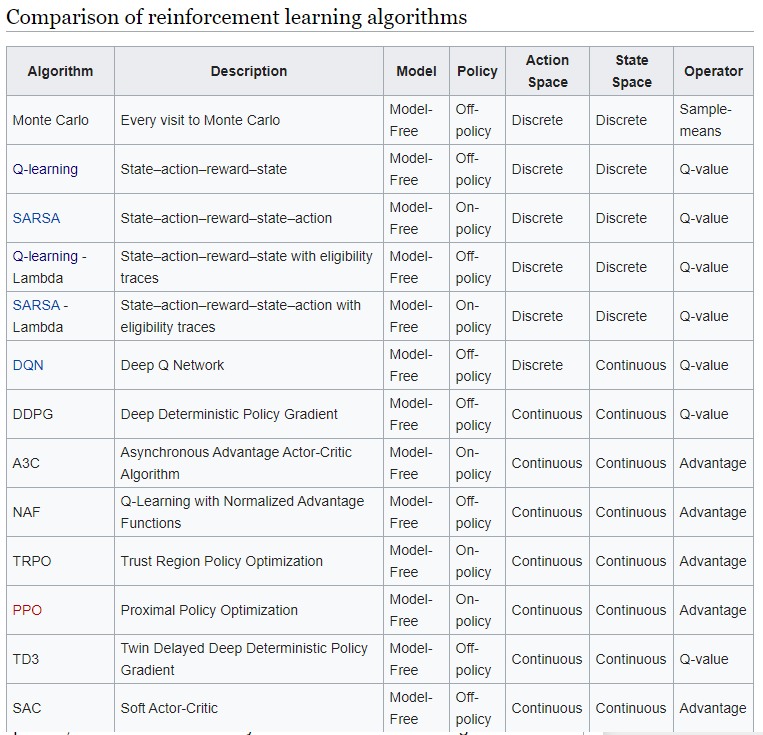

***

## 3.1 CONCEPTUAL FRAMEWORK

Before delving into the details of the actor critic, let’s remind ourselves of the Policy Gradient .
What does it mean to have a policy based reinforcement learning?
To put it simply imagine that a robot find itself in some situation, but it appears that this situation is similar to something it had experienced before.
So the policy based method says: since I have taken action (a) in this particular situation in the past, let’s try the same action this time too.

However, this might not be the perfect action this time!
It might happen that there is a trigger to simply open the gate thus sparing valuable energy, that might be used later on.
Based on this concept, the robot has to make some retrospective review to check how useful that action (using his rockets) was.

Keep in mind that the objective is to always get the highest rewards.
To be able to do so we must define a function that collects these rewards and work to optimize it in order to maximize those rewards.
Another equally important point, is that we are going to do this using a neural network.
So what we will be doing is to find the set of weights 𝜽 of the neural network that helps us maximize the objective function.


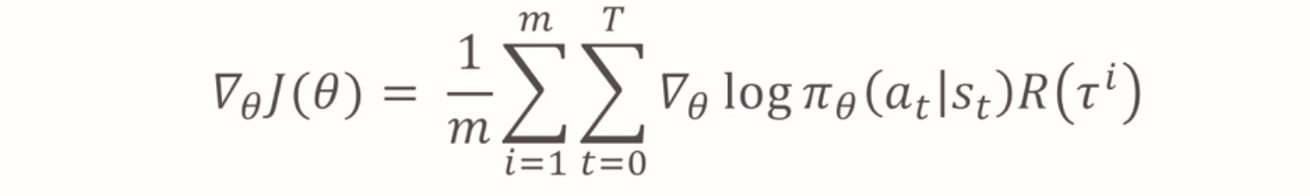

What this equation tells us is that the gradient of J(𝜽) is the average of all m trajectories, where each trajectory is the sum of the steps that compose it. At each of this step we compute the derivative of the log of the policy 𝛑 and multiply it by the return R(𝞽ⁱ).
In other words we are trying to find how the policy varies following 𝜽. The use of the return R(𝞽ⁱ) is to amplify (or to reduce) those variations. Meaning that if R(𝞽ⁱ) is high, it will boost the result and makes the neural network confident that 𝜽 progress in the right direction.
However there is an issue with the return R(𝞽ⁱ).

What if we push our thinking deeper?
The Rt (return starting at step t) is not bad, but we are not really sure what value of Rt is considered good enough to be taken into consideration?!
Take the example of the robot at the beginning of the article, was using the rockets to jump a good solution ? How do we know ? How good was it ?
Similarly, if you take the example of 100m sprinter who scored 10s, did he do good or bad? If it was good then how good was it ?
One way to give a meaning to this number is by comparing it to a reference, or what we call a baseline.
Baselines can take several forms, one of them is the expected performance or in other terms the average performance. If the sprinter got 10s but the average is 12s, then he did very good, conversely if the average is 8s then he did poorly.
Let’s denote the baseline as b𝑡, the gradient of the objective function becomes:


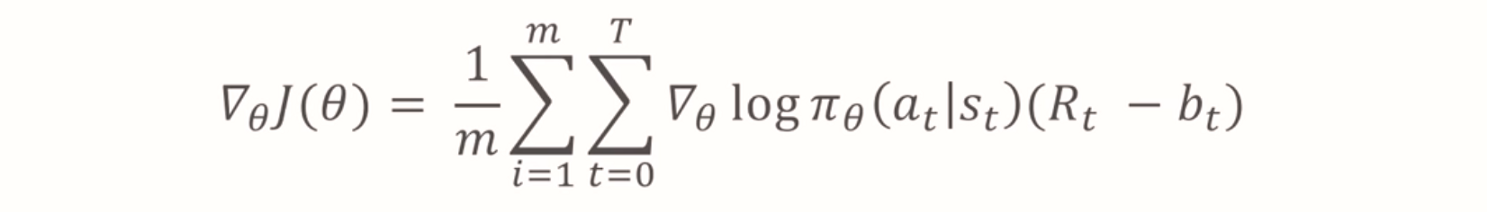

But don’t be in a hurry. Let’s refresh for a moment on our previous knowledge. As you may know, there are two main types of RL methods out there:

Value Based: They try to find or approximate the optimal value function, which is a mapping between an action and a value. The higher the value, the better the action. The most famous algorithm is Q learning and all its enhancements like Deep Q Networks, Double Dueling Q Networks, etc

Policy-Based: Policy-Based algorithms like Policy Gradients and REINFORCE try to find the optimal policy directly without the Q -value as a middleman.

Each method has their advantages. For example, policy-based are better for continuous and stochastic environments, have a faster convergence, while Value based are more sample efficient and steady. Check my previous posts on Reinforcement learning for more details.

When those two algorithmic families established in the scientific communities, the next obvious step is… to try to merge them. And this is how the Actor-Critic was born. Actor-Critics aim to take advantage of all the good stuff from both value-based and policy-based while eliminating all their drawbacks. And how do they do this?

The principal idea is to split the model in two: one for computing an action based on a state and another one to produce the Q values of the action.

The actor takes as input the state and outputs the best action. It essentially controls how the agent behaves by learning the optimal policy (policy-based). The critic, on the other hand, evaluates the action by computing the value function (value based). Those two models participate in a game where they both get better in their own role as the time passes. The result is that the overall architecture will learn to play the game more efficiently than the two methods separately.

Summarizing:

> **Value Based:** They try to find or approximate the optimal value function, which is a mapping between an action and a value. The higher the value, the better the action. The most famous algorithm is Q learning and all its enhancements like Deep Q Networks, Double Dueling Q Networks, etc

> **Policy-Based:** Policy-Based algorithms like Policy Gradients and REINFORCE try to find the optimal policy directly without the Q -value as a middleman.

Each method has their advantages. For example, policy-based are better for continuous and stochastic environments, have a faster convergence, while Value based are more sample efficient and steady. Check my previous posts on Reinforcement learning for more details.

When those two algorithmic families established in the scientific communities, the next obvious step is… to try to merge them. And this is how the Actor-Critic was born. Actor-Critics aim to take advantage of all the good stuff from both value-based and policy-based while eliminating all their drawbacks. And how do they do this?

The principal idea is to split the model in two: one for computing an action based on a state and another one to produce the Q values of the action.

The actor takes as input the state and outputs the best action. It essentially controls how the agent behaves by learning the optimal policy (policy-based). The critic, on the other hand, evaluates the action by computing the value function (value based). Those two models participate in a game where they both get better in their own role as the time passes. The result is that the overall architecture will learn to play the game more efficiently than the two methods separately.

https://theaisummer.com/Actor_critics/

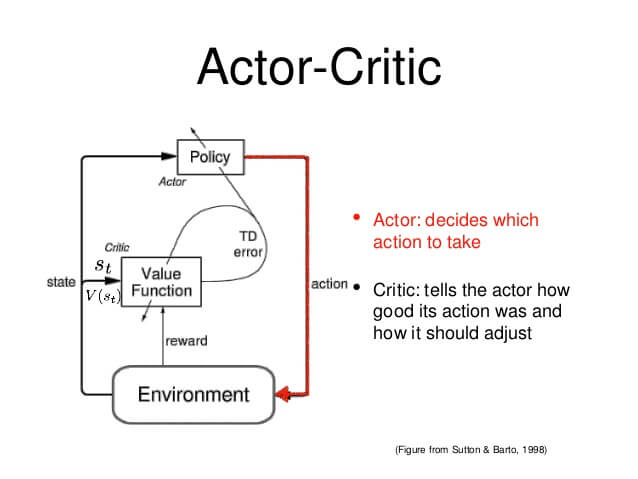

https://towardsdatascience.com/introduction-to-actor-critic-7642bdb2b3d2

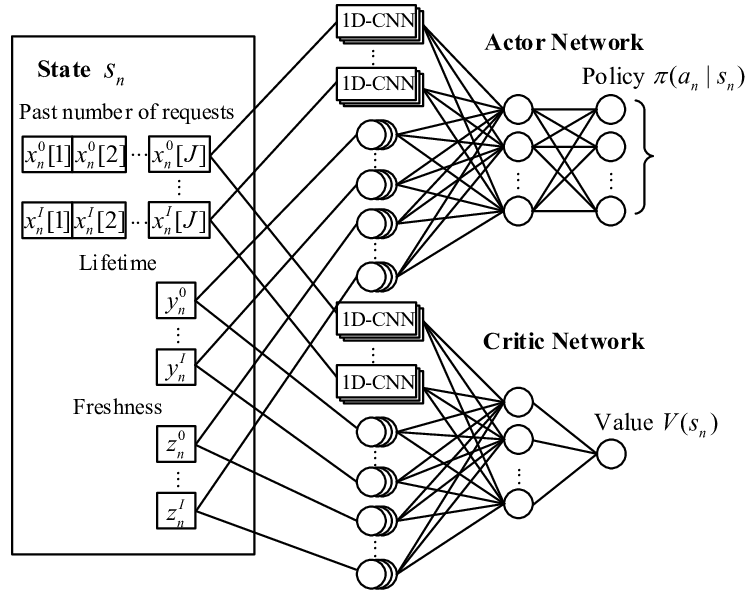

## 3.2. INVESTMENT ALGORITHM

In [3]:
## Actor-critic Duel agent

from collections import deque
import random

df= df_full.copy()
name = 'Actor-critic Duel agent'

class Actor:
    def __init__(self, name, input_size, output_size, size_layer):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, input_size))
            feed_actor = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            tensor_action, tensor_validation = tf.split(feed_actor,2,1)
            feed_action = tf.layers.dense(tensor_action, output_size)
            feed_validation = tf.layers.dense(tensor_validation, 1)
            self.logits = feed_validation + tf.subtract(feed_action,
                                                        tf.reduce_mean(feed_action,axis=1,keep_dims=True))

class Critic:
    def __init__(self, name, input_size, output_size, size_layer, learning_rate):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, input_size))
            self.Y = tf.placeholder(tf.float32, (None, output_size))
            self.REWARD = tf.placeholder(tf.float32, (None, 1))
            feed_critic = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            tensor_action, tensor_validation = tf.split(feed_critic,2,1)
            feed_action = tf.layers.dense(tensor_action, output_size)
            feed_validation = tf.layers.dense(tensor_validation, 1)
            feed_critic = feed_validation + tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
            feed_critic = tf.nn.relu(feed_critic) + self.Y
            feed_critic = tf.layers.dense(feed_critic, size_layer//2, activation = tf.nn.relu)
            self.logits = tf.layers.dense(feed_critic, 1)
            self.cost = tf.reduce_mean(tf.square(self.REWARD - self.logits))
            self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)
            
class Agent:

    LEARNING_RATE = 0.001
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    COPY = 1000
    T_COPY = 0

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.actor = Actor('actor-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.actor_target = Actor('actor-target', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.critic = Critic('critic-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.critic_target = Critic('critic-target', self.state_size, self.OUTPUT_SIZE, 
                                    self.LAYER_SIZE, self.LEARNING_RATE)
        self.grad_critic = tf.gradients(self.critic.logits, self.critic.Y)
        self.actor_critic_grad = tf.placeholder(tf.float32, [None, self.OUTPUT_SIZE])
        weights_actor = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='actor')
        self.grad_actor = tf.gradients(self.actor.logits, weights_actor, -self.actor_critic_grad)
        grads = zip(self.grad_actor, weights_actor)
        self.optimizer = tf.train.AdamOptimizer(self.LEARNING_RATE).apply_gradients(grads)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _assign(self, from_name, to_name):
        from_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=from_name)
        to_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=to_name)
        for i in range(len(from_w)):
            assign_op = to_w[i].assign(from_w[i])
            self.sess.run(assign_op)
            
    def _memorize(self, state, action, reward, new_state, dead):
        self.MEMORIES.append((state, action, reward, new_state, dead))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()
            
    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            prediction = self.sess.run(self.actor.logits, feed_dict={self.actor.X:[state]})[0]
            action = np.argmax(prediction)
        return action
    
    def _construct_memories_and_train(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        Q = self.sess.run(self.actor.logits, feed_dict={self.actor.X: states})
        Q_target = self.sess.run(self.actor_target.logits, feed_dict={self.actor_target.X: states})
        grads = self.sess.run(self.grad_critic, feed_dict={self.critic.X:states, self.critic.Y:Q})[0]
        self.sess.run(self.optimizer, feed_dict={self.actor.X:states, self.actor_critic_grad:grads})
        
        rewards = np.array([a[2] for a in replay]).reshape((-1, 1))
        rewards_target = self.sess.run(self.critic_target.logits, 
                                       feed_dict={self.critic_target.X:new_states,self.critic_target.Y:Q_target})
        for i in range(len(replay)):
            if not replay[0][-1]:
                rewards[i] += self.GAMMA * rewards_target[i]
        cost, _ = self.sess.run([self.critic.cost, self.critic.optimizer], 
                                feed_dict={self.critic.X:states, self.critic.Y:Q, self.critic.REWARD:rewards})
        return cost
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self._select_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign('actor-original', 'actor-target')
                    self._assign('critic-original', 'critic-target')
                
                action = self._select_action(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                
                self._memorize(state, action, invest, next_state, starting_money < initial_money)
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                state = next_state
                replay = random.sample(self.MEMORIES, batch_size)
                cost = self._construct_memories_and_train(replay)
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 20, checkpoint = 10, initial_money = initial_money)

states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)



Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
epoch: 10, total rewards: 542.400040.3, cost: 0.002285, total money: 5759.700073
epoch: 20, total rewards: 689.510010.3, cost: 0.005472, total money: 3753.330017
day 0: buy 1 unit at price 107.949997, total balance 9892.050003
day 3, sell 1 unit at price 108.339996, investment 0.361278 %, total balance 10000.389999,
day 9: buy 1 unit at price 112.269997, total balance 9888.120003
day 10, sell 1 unit at price 112.989998, investment 0.641312 %, total balance 10001.110001,
day 14: buy 1 unit at price 114.209999, total balance 9886.900002
day 16, sell 1 unit at price 115.699997, investment 1.304612 %, total balance 10002.599998,
day 19: buy 1 unit at price 115.110001, total balance 9887.489998
day 20, sell 1 unit at price 115.669998, investment 0.486489 %, total balance 10003.159996,
day 21: buy 1 unit at price 116.870003, total balance 9886.289993
day 22, sell 

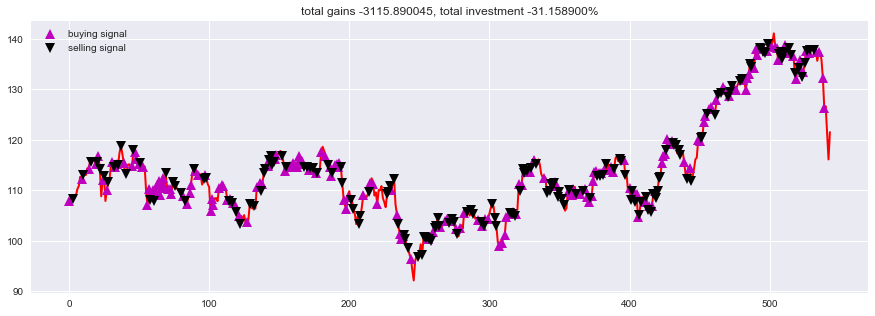

In [4]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
#plt.savefig('output/'+name+'.png')
plt.show()